# Lending club dataset EDA and ANN model using Tensorflow & Keras

## The Data

This EDA will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### The Goal :

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict whether or not a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan.

The "loan_status" column contains our label.

### Data Overview

----
-----
There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

## Importing necessary dependancies -



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# might be needed depending on your version of Jupyter
%matplotlib inline

In [4]:
filepath = '/content/lending_club_loan_two.csv'
df = pd.read_csv(filepath)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

-----
------

# Section 1: Exploratory Data Analysis

**OVERALL GOAL: To get an understanding of which variables are important, view summary statistics, and visualize the data**


----

**Since we will be attempting to predict loan_status, we will create a countplot as shown below.**

<Axes: xlabel='loan_status', ylabel='count'>

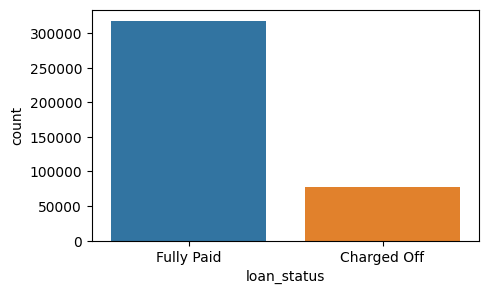

In [6]:
plt.figure(figsize=(5,3))
sns.countplot(data = df,x='loan_status')

**To Create a histogram of the loan_amnt column.**

<Axes: xlabel='loan_amnt', ylabel='Count'>

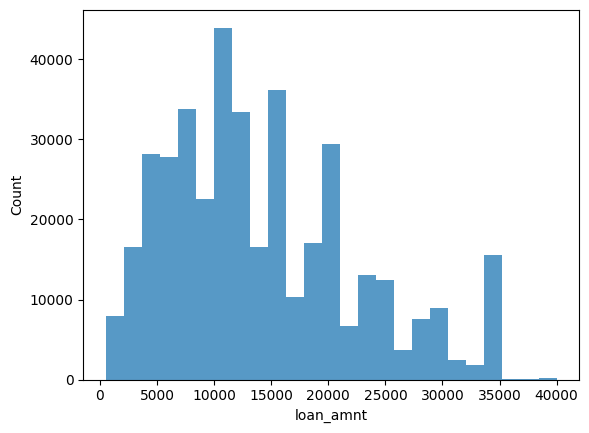

In [7]:
sns.histplot(data = df,x='loan_amnt',bins = 25,edgecolor = None)

**Let's explore correlation between the continuous feature variables. Calculating the correlation between all continuous numeric variables using .corr() method.**

In [8]:
df.corr()

<ipython-input-8-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


**Visualizing this using a seaborn heatmap.**

<ipython-input-9-0ed582b9d953>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True,cmap = 'viridis')


<Axes: >

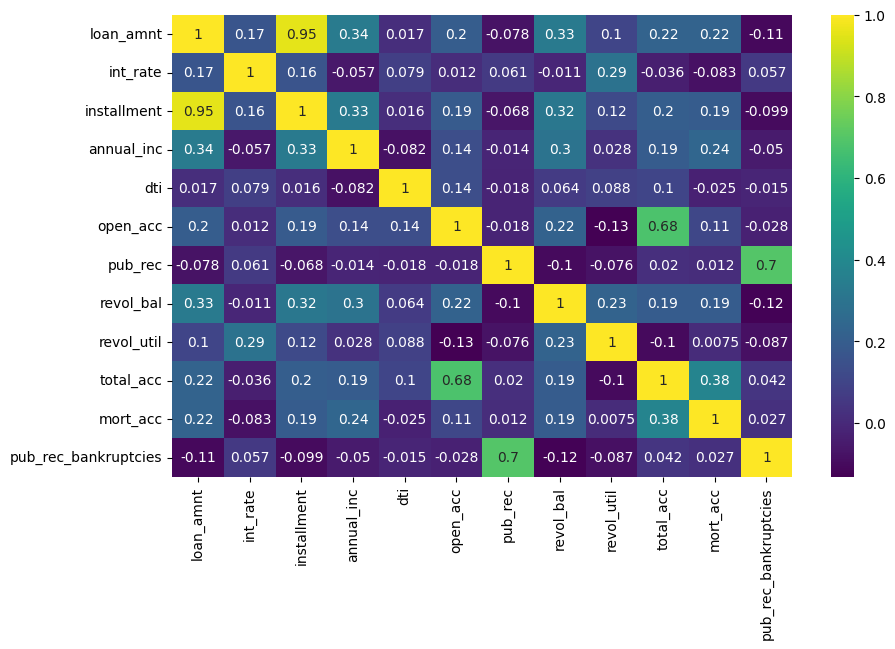

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot = True,cmap = 'viridis')

**A strong co-relation is noticed with ''loan amount'' and the "installment" feature. Exploring this feature further.**

<Axes: xlabel='installment', ylabel='loan_amnt'>

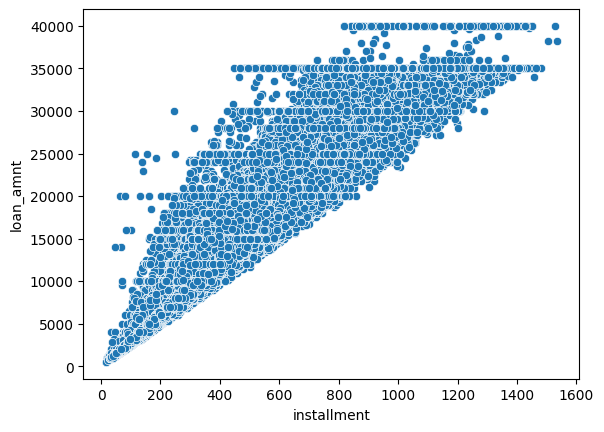

In [11]:
sns.scatterplot(data=df,x='installment',y='loan_amnt')

**Creating a boxplot showing the relationship between the loan_status and the Loan Amount.**

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

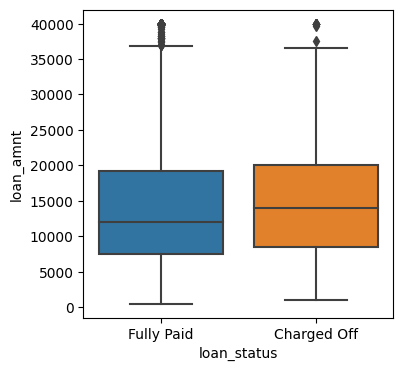

In [12]:
plt.figure(figsize=(4,4))
sns.boxplot(data = df, x='loan_status',y='loan_amnt')

**Calculating the summary statistics for the loan amount, grouped by the loan_status.**

In [13]:
grp = df.groupby(by = 'loan_status')

In [14]:
grp.describe()['loan_amnt']

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


**Exploring the Grade and SubGrade columns that LendingClub attributes to the loans.**

In [15]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [16]:
sub_list = list(df['sub_grade'].unique())
sub_list.sort()
sub_list

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

**Creating a countplot per grade.**

<Axes: xlabel='grade', ylabel='count'>

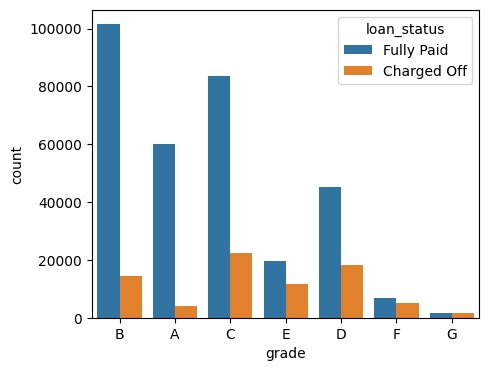

In [17]:
plt.figure(figsize=(5,4))
sns.countplot(data = df,x='grade',hue = 'loan_status')

<Axes: xlabel='sub_grade', ylabel='count'>

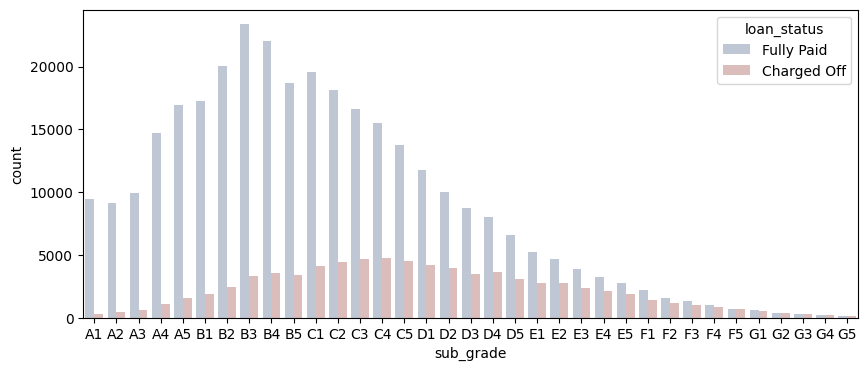

In [18]:
plt.figure(figsize=(10,4))
sns.countplot(data = df,x='sub_grade',hue = 'loan_status',order = sub_list,palette = 'vlag')

**Displaying a count plot per subgrade. Explore both all loans made per subgrade as well being separated based on the loan_status.**

<Axes: xlabel='sub_grade', ylabel='count'>

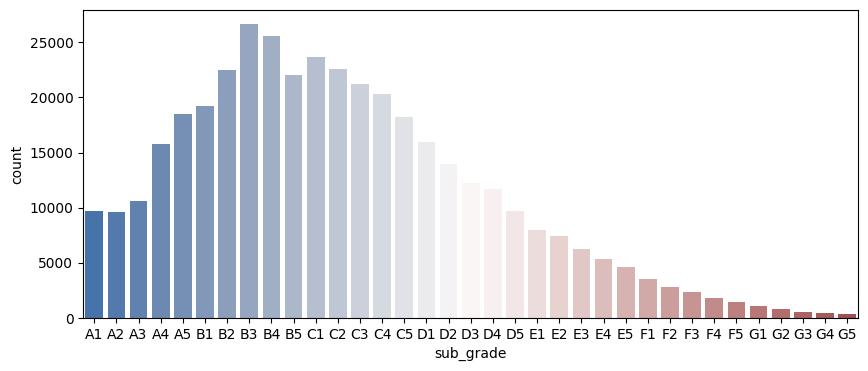

In [19]:
plt.figure(figsize=(10,4))
sns.countplot(data = df,x='sub_grade',order =sub_list,palette = 'vlag')

**Observation: It looks like F and G subgrades don't get paid back that often. Isloating these subgrades and recreating the countplot just for those subgrades.**

<Axes: xlabel='sub_grade', ylabel='count'>

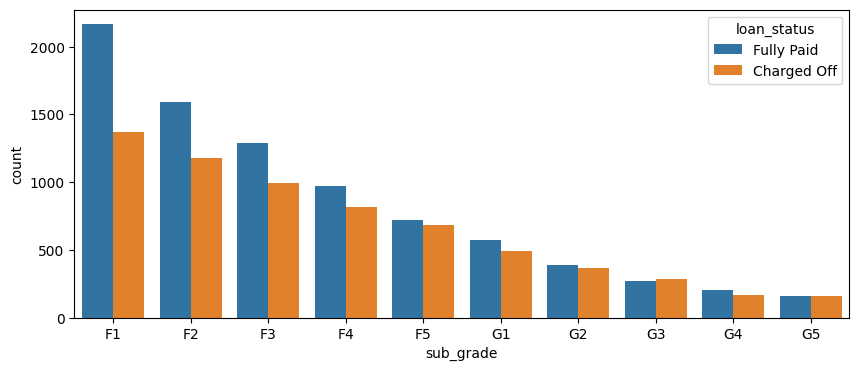

In [20]:
plt.figure(figsize=(10,4))
sns.countplot(data = df,x='sub_grade',hue='loan_status',order =['F1','F2','F3',
                                                                'F4','F5','G1',
                                                                'G2','G3','G4','G5'])

**Creating a new column called 'loan_repaid' which will contain a Binary classification - '1' if the loan status was "Fully Paid" and a '0' if it was "Charged Off".**

In [21]:
def dummy(char):
    if char == 'Fully Paid':
        return 1
    else:
        return 0

In [22]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [23]:
df['loan_repaid'] = df['loan_status'].apply(dummy)

In [24]:
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


**Creating a bar plot showing the correlation of the numeric features to the new loan_repaid column.**

<Axes: >

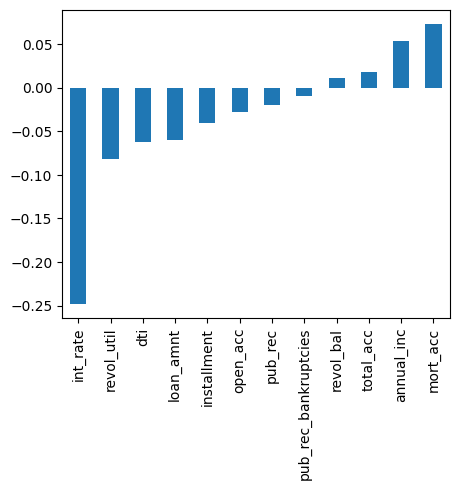

In [25]:
plt.figure(figsize=(5,4))
df.corr(numeric_only = True)['loan_repaid'][:-1].sort_values().plot(kind = 'bar')

---
---
# Section 2: Data PreProcessing

**Section Goals: Removing or imputing any missing data. Removing unnecessary or repetitive features. Converting categorical string features to dummy variables.**



In [26]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


# Missing Data

**Let's explore this missing data columns. We use a variety of factors to decide whether or not they would be useful, to see if we should keep, discard, or fill in the missing data.**

**What is the length of the dataframe?**

In [27]:
len(df)


396030

**Creating a Series that displays the total count of missing values per column.**

In [28]:
df.isnull().sum()/len(df)*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

**Converting this Series to be in terms of percentage of the total DataFrame.**

**Let's examine emp_title and emp_length to see if it will be okay to drop them.**

**How many unique employment job titles are there?**

In [29]:
df['emp_title'].nunique()

173105

In [30]:
df['emp_title'].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

**Realistically, there are too many unique job titles to try to convert this to a dummy variable feature. Removing the 'emp_title' column.**

In [31]:
df.drop('emp_title',axis =1,inplace = True)

**Creating a count plot of the emp_length feature column and Sorting the order of the values.**

In [32]:
order_list = df['emp_length'].unique()


In [33]:
list(order_list)

['10+ years',
 '4 years',
 '< 1 year',
 '6 years',
 '9 years',
 '2 years',
 '3 years',
 '8 years',
 '7 years',
 '5 years',
 '1 year',
 nan]

<Axes: xlabel='emp_length', ylabel='count'>

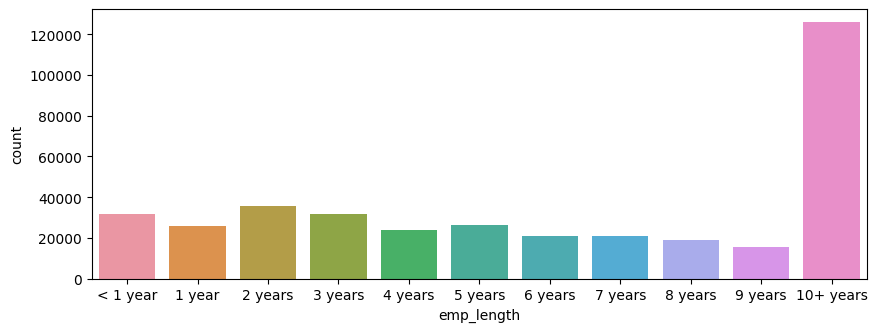

In [34]:
plt.figure(figsize=(10,3.5))
sns.countplot(data = df, x='emp_length',order = ['< 1 year','1 year','2 years','3 years','4 years','5 years','6 years',
                                                 '7 years','8 years','9 years','10+ years'])

**Creating a Plot out of the countplot with a hue separating Fully Paid vs Charged Off**

<Axes: xlabel='emp_length', ylabel='count'>

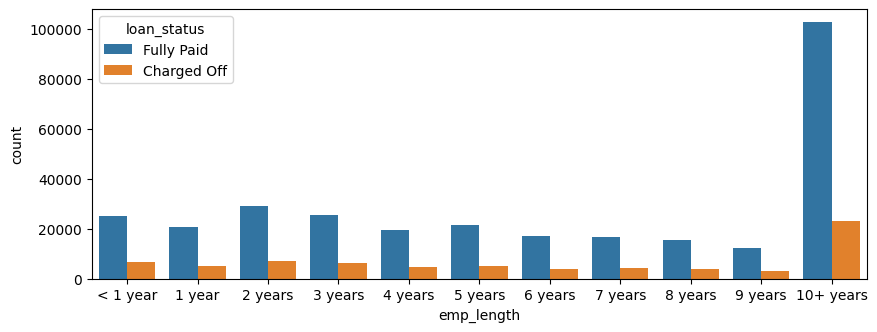

In [35]:
plt.figure(figsize=(10,3.5))
sns.countplot(data = df, x='emp_length',order = ['< 1 year','1 year','2 years','3 years','4 years','5 years','6 years',
                                                 '7 years','8 years','9 years','10+ years'],hue = 'loan_status')

**This still doesn't really inform us if there is a strong relationship between employment length and being charged off, what we want is the percentage of charge offs per category. Essentially informing us what percent of people per employment category didn't pay back their loan.**

In [36]:
emp_co = df[df['loan_status']=="Charged Off"].groupby("emp_length").count()['loan_status']
emp_fp = df[df['loan_status']=="Fully Paid"].groupby("emp_length").count()['loan_status']
emp_len = emp_co/emp_fp
emp_len

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

<Axes: xlabel='emp_length'>

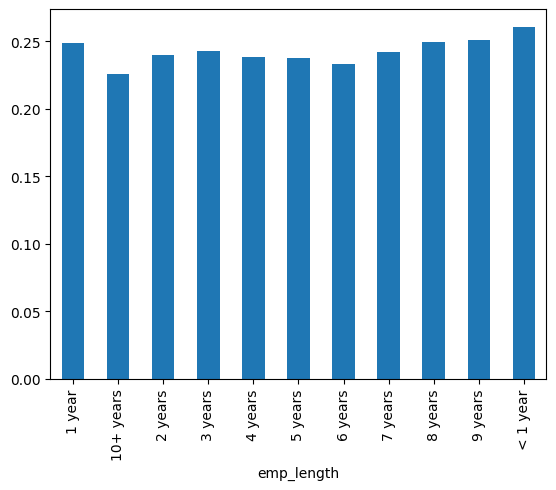

In [37]:
emp_len.plot(kind='bar')

**Charge off rates are extremely similar across all employment lengths. Dropping the emp_length column.**

In [38]:
df.drop('emp_length',axis = 1,inplace = True)

**Revisiting the DataFrame to see what feature columns still have missing data.**

In [39]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**Review the title column vs the purpose column to check if this is repeated information**

In [40]:
df['purpose'].unique()

array(['vacation', 'debt_consolidation', 'credit_card',
       'home_improvement', 'small_business', 'major_purchase', 'other',
       'medical', 'wedding', 'car', 'moving', 'house', 'educational',
       'renewable_energy'], dtype=object)

In [41]:
df['title'].unique()

array(['Vacation', 'Debt consolidation', 'Credit card refinancing', ...,
       'Credit buster ', 'Loanforpayoff', 'Toxic Debt Payoff'],
      dtype=object)

In [42]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

**The title column is simply a string subcategory/description of the purpose column. Going ahead and dropping the title column.**

In [43]:
df.drop('title',axis = 1,inplace = True)

**Creating a value_counts of the mort_acc column.**

In [44]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

**There are many ways we could deal with the missing data. We could attempt to build a simple model to fill it in, such as a linear model, we could just fill it in based on the mean of the other columns, or you could even bin the columns into categories and then set NaN as its own category.**

In [45]:
df.corr()['mort_acc'].sort_values()

<ipython-input-45-08a22ffe92b2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['mort_acc'].sort_values()


int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

**Looks like the total_acc feature correlates with the mort_acc ,this makes sense! Let's try this fillna() approach. We will group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry. To get the result below:**

In [46]:
mort_mean = df.groupby('total_acc')['mort_acc'].mean()

**Let's fill in the missing mort_acc values based on their total_acc value. If the mort_acc is missing, then we will fill in that missing value with the mean value corresponding to its total_acc value from the Series we created above. This involves using an .apply() method with two columns.**

In [47]:
mort_mean

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [48]:
df[df['mort_acc'].isna()]['total_acc']

22         7.0
25        10.0
32        18.0
41        16.0
62        17.0
          ... 
395991    21.0
395995    20.0
396016    23.0
396021    50.0
396029    19.0
Name: total_acc, Length: 37795, dtype: float64

In [49]:
def fill_mort_acc(total_acc,mort_acc):
    '''
    Accepts the total_acc and mort_acc values for the row.
    Checks if the mort_acc is NaN , if so, it returns the avg mort_acc value
    for the corresponding total_acc value for that row.

    total_acc_avg here should be a Series or dictionary containing the mapping of the
    groupby averages of mort_acc per total_acc values.
    '''
    if np.isnan(mort_acc):
        return mort_mean[total_acc]
    else:
        return mort_acc

In [50]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [51]:
df.isna().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

**revol_util and the pub_rec_bankruptcies have missing data points, but they account for less than 0.5% of the total data. So Going ahead and removing the rows that are missing those values in those columns with df.dropna().**

In [52]:
df.dropna(inplace = True)

In [53]:
df.isna().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

## Categorical Variables and Dummy Variables

**We're done working with the missing data! Now we just need to deal with the string values due to the categorical columns and encode them to parse data into machine learning algorithm.**


In [54]:
df.select_dtypes(include=['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

---
**Let's now go through all the string features to see what we should do with them.**

---


### Term feature

**Converting the term feature into either a 36 or 60 integer numeric data type using .apply()**

In [55]:
def term_val(num):
    return int(num.split(' ')[1])

In [56]:
df['term']=df['term'].apply(term_val)

### Grade feature

**We already know grade is part of sub_grade, so just dropping the grade feature.**

In [57]:
df.drop('grade',axis=1,inplace=True)

**Converting the subgrade into dummy variables. Then concatenating these new columns to the original dataframe.**

In [58]:
df = df.join(pd.get_dummies(data= df['sub_grade'],drop_first=True))

In [59]:
df.drop('sub_grade',axis =1,inplace = True)

In [60]:
df.select_dtypes(include=['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

### Dealing with verification_status, application_type,initial_list_status,purpose columns-
**Converting these columns: ['verification_status', 'application_type','initial_list_status','purpose'] into dummy variables and concatenate them with the original dataframe.**

In [61]:
df = df.join(pd.get_dummies(data= df[['verification_status', 'application_type','initial_list_status','purpose']],drop_first=True))

In [62]:
df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1,inplace= True)

In [63]:
df.select_dtypes(include=['object']).columns

Index(['home_ownership', 'issue_d', 'loan_status', 'earliest_cr_line',
       'address'],
      dtype='object')

### Home_ownership
**Reviewing the value_counts for the home_ownership column.**

In [64]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

**Converting these to dummy variables**

In [65]:
def ownership(val):
    if val == 'NONE':
        return 'OTHER'
    if val == 'ANY':
        return 'OTHER'
    else:
        return val


In [66]:
df['home_ownership'] = df['home_ownership'].apply(ownership)

In [67]:
df['home_ownership'].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER'], dtype=object)

In [68]:
df = df.join(pd.get_dummies(data = df['home_ownership'],drop_first=True))

In [69]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'issue_d', 'loan_status', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purp

### Address
**Let's feature engineer a zip code column from the address in the data set. Creating a column called 'zip_code' that extracts the zip code from the address column.**

In [70]:
df['zip_code'] = df['address'].apply(lambda address:address[-5:])

**Converting the zip_code column into dummy variables using pandas. Concatenating the result to original dataframe and dropping the address column.**

In [72]:
df = df.join(pd.get_dummies(df['zip_code'],drop_first=True))

In [73]:
df.drop(['address'],axis = 1,inplace = True)

### issue_d

**This would be cause data leakage,as we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date. Hence, dropping this feature.**

In [74]:
df.drop(['issue_d'],axis = 1,inplace = True)

### earliest_cr_line
**This appears to be a historical time stamp feature. Extract the year from this feature using a .apply function, then converting it to a numeric feature. Setting this new data to a feature column called 'earliest_cr_year'.Then dropping the earliest_cr_line feature.**

In [75]:
from datetime import date,datetime

In [76]:
df['earliest_cr_year']=df['earliest_cr_line'].apply(lambda x: int(x[-4:]))

In [77]:
df.drop(['earliest_cr_line','home_ownership'],axis =1,inplace = True)

## Train Test Split

**TASK: Import train_test_split from sklearn.**

In [78]:
from sklearn.model_selection import train_test_split

**dropping the load_status column we created earlier, since its a duplicate of the loan_repaid column. We'll use the loan_repaid column since its already in 0s and 1s.**

In [79]:
df.drop(['loan_status'],axis = 1,inplace = True)

**TASK: Set X and y variables to the .values of the features and label.**

In [80]:
X = df.drop('loan_repaid',axis = 1).values

In [81]:
y = df['loan_repaid'].values

**Performing a train/test split with test_size=0.2 and a random_state of 101.**

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Normalizing the Data

**Using a MinMaxScaler to normalize the feature data X_train and X_test.We fit only on the X_train data inorder to prevent any sort of data leakage.**

In [83]:
from sklearn.preprocessing import MinMaxScaler

In [84]:
scaler = MinMaxScaler()

In [85]:
X_train = scaler.fit_transform(X_train)

In [86]:
X_test = scaler.transform(X_test)

# Creating the Model

In [87]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

**Choosing to build a sequential model using tensorflow and keras that will be trained on the data.**

In [88]:
#Model instantiation-
model = Sequential()

#Layer architecture configuration-
model.add(Dense(78,activation = 'relu'))
model.add(Dense(39,activation = 'relu'))
model.add(Dense(19,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

#Compiling model- (choosing loss function for binary classification and optimizer as 'adam')
model.compile(loss = 'binary_crossentropy',optimizer = 'adam')

**Fitting the model to the training data for 25 epochs with a batch_size of 256 data points. Also adding in the validation data for later plotting.**

In [89]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs = 25,batch_size = 256)

Epoch 1/25
1236/1236 [==============================] - 10s 5ms/step - loss: 0.2805 - val_loss: 0.2642
Epoch 2/25
1236/1236 [==============================] - 7s 5ms/step - loss: 0.2619 - val_loss: 0.2632
Epoch 3/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2603 - val_loss: 0.2635
Epoch 4/25
1236/1236 [==============================] - 8s 6ms/step - loss: 0.2592 - val_loss: 0.2649
Epoch 5/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2587 - val_loss: 0.2619
Epoch 6/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2581 - val_loss: 0.2615
Epoch 7/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2576 - val_loss: 0.2637
Epoch 8/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2572 - val_loss: 0.2622
Epoch 9/25
1236/1236 [==============================] - 7s 6ms/step - loss: 0.2570 - val_loss: 0.2620
Epoch 10/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.25

# Section 3: Evaluating Model Performance.

**Plotting out the validation loss versus the training loss.**

<Axes: >

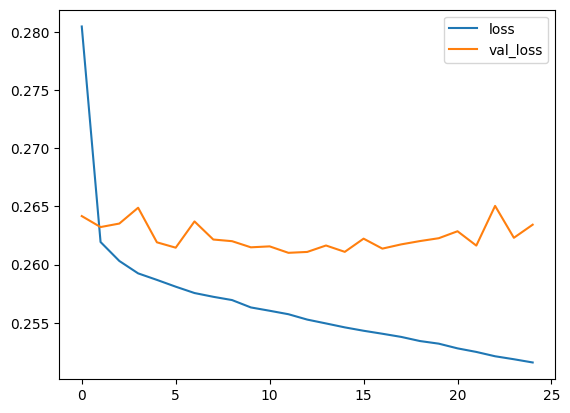

In [90]:
(pd.DataFrame(model.history.history)).plot()

In [91]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

2471/2471 [==============================] - 4s 2ms/step


**Creating predictions from the X_test set and displaying a classification report and confusion matrix for the X_test set.**

In [92]:
from sklearn.metrics import confusion_matrix,classification_report

In [93]:
print(confusion_matrix(y_test,predictions))

[[ 7799  7859]
 [ 1150 62236]]


In [94]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.50      0.63     15658
           1       0.89      0.98      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.88      0.74      0.78     79044
weighted avg       0.88      0.89      0.87     79044



## Final observations -

1. The model performed fairly good with an accuracy score of 89%, this comes at a backdrop due to class imbalance with more than 80% of labelled data indicating loan_paid and only 20% data points indicating loan charged off.

2. A precision score of 87% percent, recall of 50% and f1-score of 63% is obtained for the dataset.